# Plotting JWST images

In this notebook, we will have a taste of the real data of James Webb Space Telescope. We take the images from the [UNCOVER](https://jwst-uncover.github.io/DR1.html) survey and plot them using `python`. 

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import astropy

In [3]:
required_packages = []  # Define the required packages for this notebook

import sys
import subprocess

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Download utils.py
    !wget -q -O /content/utils.py https://raw.githubusercontent.com/AstroJacobLi/ObsAstGreene/refs/heads/main/book/docs/utils.py
    # Function to check and install missing packages
    def install_packages(packages):
        for package in packages:
            try:
                __import__(package)
            except ImportError:
                print(f"Installing {package}...")
                subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
    # Install any missing packages
    install_packages(required_packages)
else:
    # If not in Colab, adjust the path for local development
    sys.path.append('/Users/jiaxuanl/Dropbox/Courses/ObsAstGreene/book/docs/')

# Get the directory right
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive/')
  os.chdir('/content/drive/Shareddrives/AST207/data')
else:
    os.chdir('../../_static/ObsAstroData/')

Let's now open the JWST data!

In [7]:
with open('./A2744_cutoutRGB_NIRCAM.pkl', 'rb') as f:
    data = pickle.load(f)
data.keys()

dict_keys(['rIMG', 'rWCS', 'rHDR', 'rfilt', 'gIMG', 'gWCS', 'gHDR', 'gfilt', 'bIMG', 'bWCS', 'bHDR', 'bfilt'])

The `IMG` key represents the image, `WCS` is WCS of the image, `filt` is the filter name, and `HDR` is the image header. Let's plot the 

In [9]:
from utils import show_image

Plotting F115W+F150W


<Axes: >

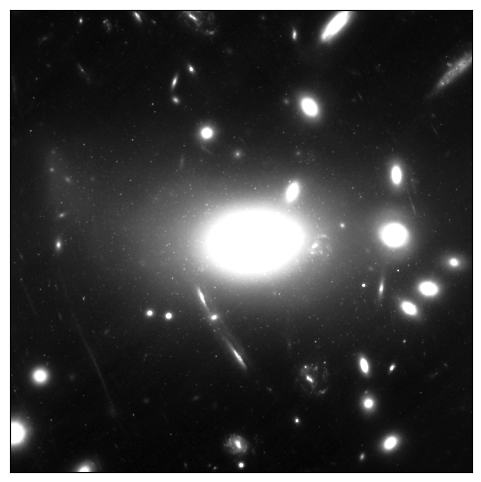

In [23]:
print('Plotting', data['bfilt'])
show_image(data['bIMG'], figsize=(6, 6), percl=0, percu=97, cmap='Greys_r')

**Exercise 1**

Try to plot the images in other bands, and try to play with the `percl` and `percu` parameters to change the dynamical range when plotting. What are the tiny dots around the brightest cluster galaxy at the center? (just make a guess)

## Let's make an color-composite image for this cluster!
Black & White images are cool but a bit boring... Let's make them colorful! Here we use the method in [Lupton et al. (2004)](https://ui.adsabs.harvard.edu/abs/2004PASP..116..133L/abstract), featuring our own [Robert Lupton](https://web.astro.princeton.edu/people/robert-lupton)! 

In [25]:
from astropy.visualization import make_lupton_rgb

Text(0, 1.02, 'g')

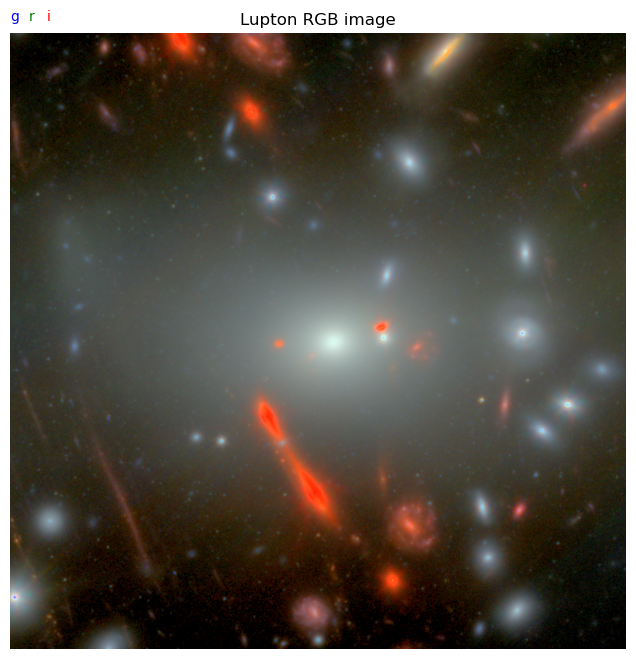

In [26]:
rgb = make_lupton_rgb(data['rIMG'], 0.85 * data['gIMG'], 1.1 * data['bIMG'], Q=10, stretch=5)

plt.figure(figsize=(8, 8))
plt.imshow(rgb, origin='lower')
plt.axis('off')

ax = plt.gca()
plt.title('Lupton RGB image')
plt.text(0.06, 1.02, 'i', transform=ax.transAxes, color='red')
plt.text(0.03, 1.02, 'r', transform=ax.transAxes, color='green')
plt.text(0, 1.02, 'g', transform=ax.transAxes, color='blue')

**Exercise 2**

1. There are three parameters in the `lupton_rgb` function: `stretch`, `Q`, and `minimum`. Try to play with these parameters, and find a combination that makes the most beautiful color image.

2. Why are a few galaxies so red in the above image?